In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Read Data**

In [2]:
url = 'https://raw.githubusercontent.com/cs575ts/Assignments/main/Assignment_2/D2.csv'

dataframe = pd.read_csv(url)

In [3]:
dataframe.head()

,Year,Sales of shampoo over a three year period
0,1,266.0
1,2,145.9
2,3,183.1
3,4,119.3
4,5,180.3


**Single Exponential Smoothing without inbuilt function**

In [4]:
s1 = dataframe["Sales of shampoo over a three year period"][0]
alpha_array = [0.3,0.6,0.9]

**Function for single exponential smoothing**

In [34]:
def dataset_with_interval(dataset):
  forecasted_list=[]
  mse_list = []
  complete_fc_val_list=[]
  for alpha in alpha_array:
    s = [s1]
    for i in range(len(dataset)):
      si = alpha*(dataset[i]) + ((1-alpha)*s[i])
      s.append(si)
    s.remove(s[0])
    
    fc_s = s.copy()
    forecasted_list.append(s[-1])
    complete_fc_val_list.append(fc_s)
    s.remove(s[-1])
    s.insert(0,dataset[0])
    cp_df = dataset.copy()
    cp_df = np.c_[ cp_df, s ] 
    error_array = cp_df[:,0] - cp_df[:,1]
    cp_df = np.c_[ cp_df, error_array ]
    sqer_arr = (cp_df[:,2])**2
    cp_df = np.c_[cp_df,sqer_arr]

    MSE = np.sum(cp_df[1:len(dataset),3])/(len(cp_df)-1) 
    mse_list.append(MSE)
  return mse_list,forecasted_list,complete_fc_val_list

**Different interval data array**

In [6]:
data= dataframe.values
dataset_array = [data[0::1][:,1],data[0::2][:,1],data[0::4][:,1],data[0::8][:,1],data[0::12][:,1],data[0::24][:,1]]


**Different interval time array**

In [7]:
time_array = []
for d in dataset_array:
  t = range(d.shape[0])
  time_array.append(t)

**Function call for MSE and prediction calculations**

In [35]:
final_mse_list = []
final_forecasted_list = []
final_fc_val_list = []
for df in dataset_array:
  mse_list,forecasted_list,complete_fc_val_list = dataset_with_interval(df)
  final_mse_list.append(mse_list)
  final_fc_val_list.append(complete_fc_val_list)
  final_forecasted_list.append(forecasted_list)

In [9]:
final_mse_list

[[7454.888537135988, 7615.7245911801065, 10264.105744208402],
 [12653.021900599482, 8084.2386586116745, 7201.649109236378],
 [23624.902100586936, 17049.645735013535, 13471.303098529728],
 [49304.15850324001, 45545.72384735999, 38662.213653959996],
 [7102.91705, 9382.224199999995, 12124.211449999999],
 [5431.689999999999, 5431.689999999999, 5431.689999999999]]

In [10]:
final_forecasted_list

[[561.3899991616986, 610.9998348620238, 639.4607975580393],
 [512.5284883267734, 591.1341048132538, 590.1224246682401],
 [418.816685207, 554.214436352, 653.2543771070001],
 [387.77851999999996, 523.31552, 646.2957200000001],
 [273.053, 293.012, 325.877],
 [288.11, 310.22, 332.33000000000004]]

In [11]:
min_idx=[]
for minval in final_mse_list: 
  minidx = minval.index(min(minval))
  min_idx.append(minidx)

In [12]:
interval_arr = [1,2,4,8,12,24]

**Plotting function for predicted values ad actual values**

In [13]:
def plotting_function(fc_val,data_val,time_val,interval_val):
  fig = plt.gcf()
  plt.plot(time_val,data_val,color='g',label='Original')
  plt.plot(time_val,fc_val,color='r',label='Forcasted')
  fig.set_size_inches(12,8)
  plt.legend()
  plt.xlabel('Time (in months)')
  plt.ylabel('Sales of shampoo over a three year period')
  plt.title('Prediction at '+str(interval_val)+' month interval at the least MSE')
  plt.figure()
  plt.close

**Plotting of predicted values and actual values for different intervals**

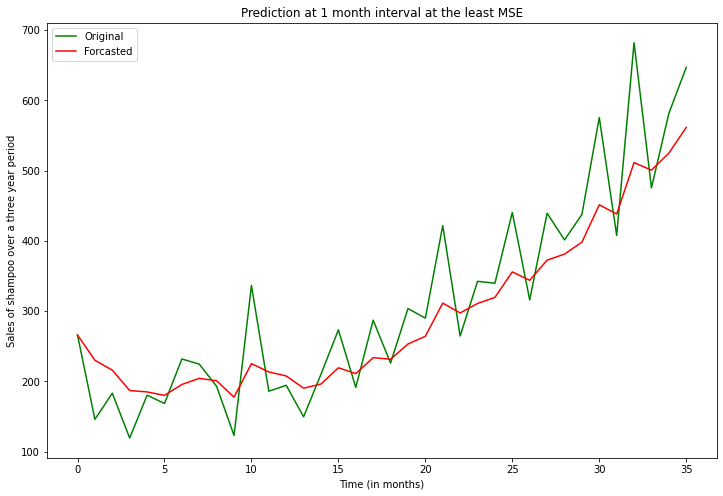

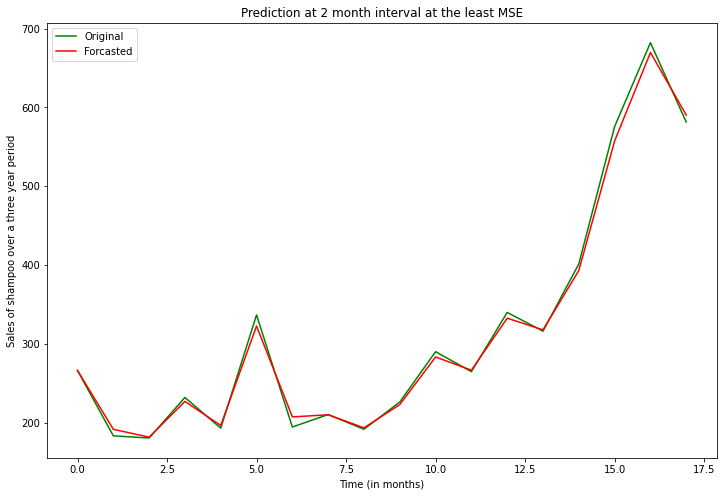

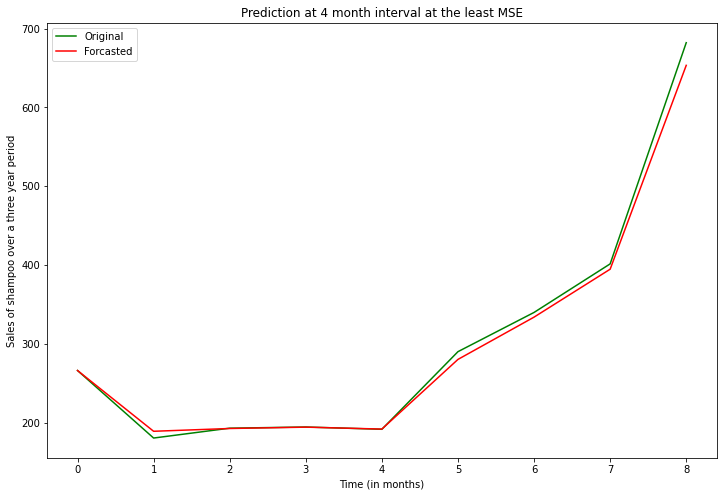

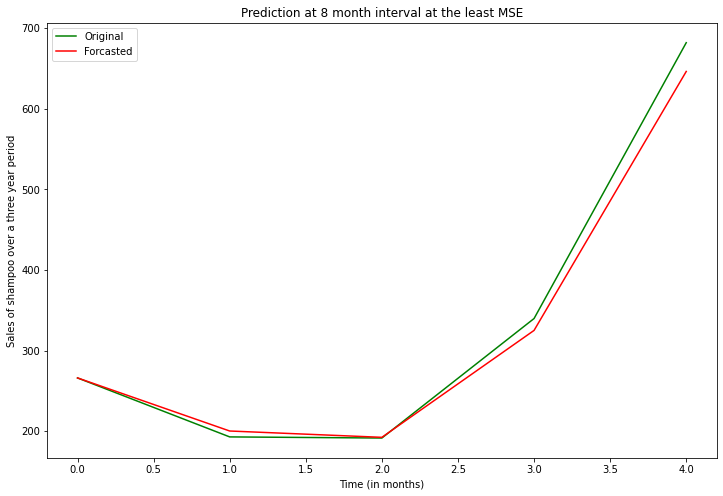

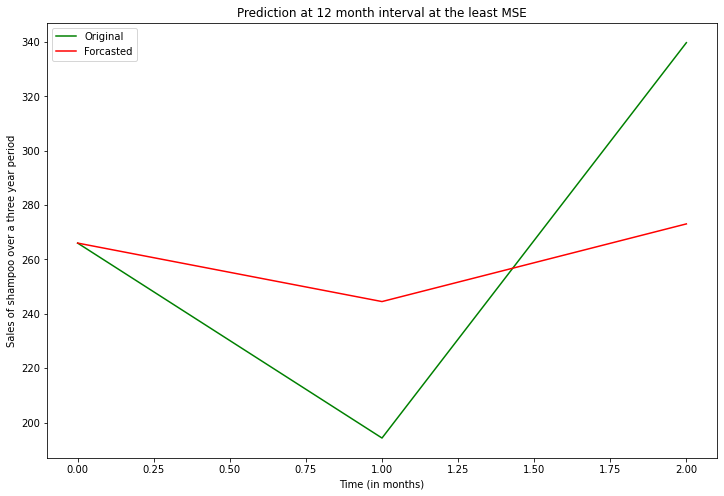

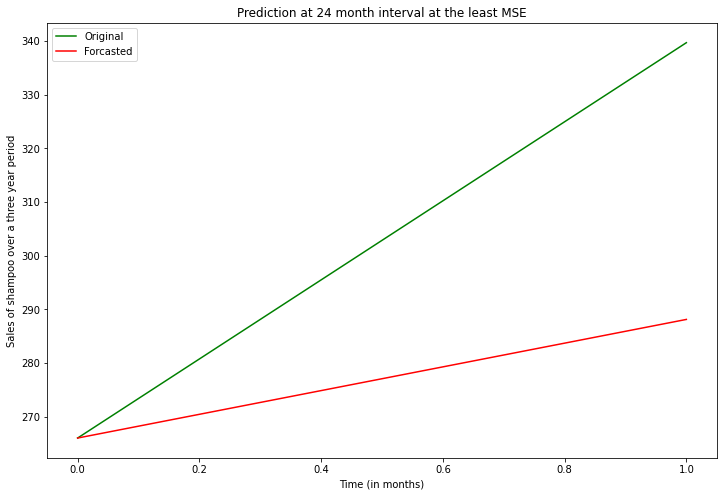

<Figure size 432x288 with 0 Axes>

In [14]:
for fc_idx in range(6):
  plotting_function(final_fc_val_list[fc_idx][min_idx[fc_idx]],dataset_array[fc_idx],time_array[fc_idx],interval_arr[fc_idx])  

**Table of Least MSE value for each interval**

In [15]:
from tabulate import tabulate

tab_array = []
for n in range(6):
  tab = [(interval_arr[n]),final_mse_list[n][min_idx[n]]]
  tab_array.append(tab)

table = tabulate(tab_array, headers=['interval(in months)', 'Least MSE'], tablefmt='orgtbl')

print(table)

|   interval(in months) |   Least MSE |
|-----------------------+-------------|
|                     1 |     7454.89 |
|                     2 |     7201.65 |
|                     4 |    13471.3  |
|                     8 |    38662.2  |
|                    12 |     7102.92 |
|                    24 |     5431.69 |


**Plotting of MSE at different intervals**

In [16]:
def mse_plotting_func(inter_val,mseval):
  fig = plt.gcf()
  ax = fig.add_axes([0,0,1,1])
  rects = ax.bar(inter_val,round(mseval,2),color='b')
  for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  fig.set_size_inches(12,8)
  plt.xlabel('Interval(in months)')
  plt.ylabel('MSE')
  plt.title('MSE VS Interval')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


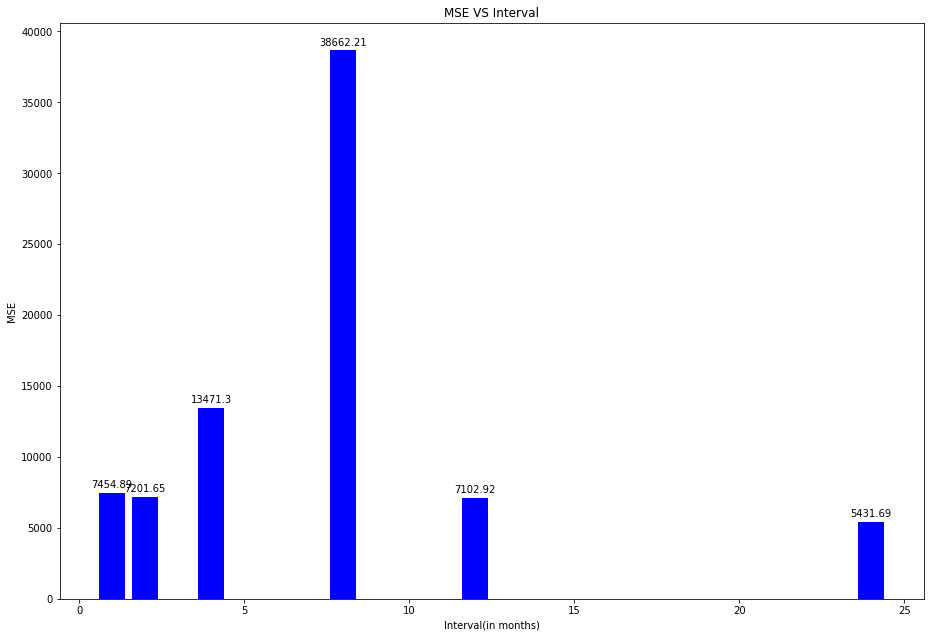

In [17]:
for idx in range(6):
  mse_plotting_func(interval_arr[idx],final_mse_list[idx][min_idx[idx]])

**Comparing forecasted values with inbuilt function (on original data)**

In [41]:
from sklearn.metrics import mean_squared_error

model = SimpleExpSmoothing(dataframe['Sales of shampoo over a three year period'])
dataframe['pred_val'] = model.fit(smoothing_level=0.9).fittedvalues.shift(0)

#MSE = mean_squared_error(dataframe.pred_val.dropna(),dataframe['Sales of shampoo over a three year period'])

MSE = mean_squared_error(dataframe['pred_val'],dataframe['Sales of shampoo over a three year period'])

In [42]:
print('MSE (inbuilt function): ',MSE)
print('MSE (own function): ',final_mse_list[0][min_idx[0]])

MSE (inbuilt function):  9975.15357276148
MSE (own function):  7454.888537135988


In [45]:
print('Difference in error: ',abs(final_mse_list[0][min_idx[0]]-MSE))

Difference in error:  2520.265035625491
